In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,f1_score,confusion_matrix

# ------------------------------------                      preparing data   -----------------------------------------------------

# u.data

In [2]:
data=pd.read_csv("u.data.csv",header=None)
data

,0
0,0\t50\t5\t881250949
1,0\t172\t5\t881250949
2,0\t133\t1\t881250949
3,196\t242\t3\t881250949
4,186\t302\t3\t891717742
...,...
99998,880\t476\t3\t880175444
99999,716\t204\t5\t879795543
100000,276\t1090\t1\t874795795
100001,13\t225\t2\t882399156


In [3]:
data[["user_id",'item_id','rating','timestamp']]=data[0].str.split("\t",expand=True)

In [4]:
data.drop(columns=[0],inplace=True)

In [5]:
data["timestamp"]=pd.to_datetime(data["timestamp"], unit='s')

In [6]:
data.sort_values(by="user_id",inplace=True)

In [7]:
data.rename(columns={"item_id":"movie_id"},inplace=True)
# as it has been metioned in description

In [8]:
data.head()

,user_id,movie_id,rating,timestamp
0,0,50,5,1997-12-04 15:55:49
1,0,172,5,1997-12-04 15:55:49
2,0,133,1,1997-12-04 15:55:49
43862,1,66,4,1997-11-03 07:43:50
690,1,171,5,1998-03-13 01:15:11


In [9]:
data.sort_index(inplace=True)
data["user_id"]=data["user_id"].astype(int)
data["movie_id"]=data["movie_id"].astype(int)
data["rating"]=data["rating"].astype(int)

data.head()

,user_id,movie_id,rating,timestamp
0,0,50,5,1997-12-04 15:55:49
1,0,172,5,1997-12-04 15:55:49
2,0,133,1,1997-12-04 15:55:49
3,196,242,3,1997-12-04 15:55:49
4,186,302,3,1998-04-04 19:22:22


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    100003 non-null  int32         
 1   movie_id   100003 non-null  int32         
 2   rating     100003 non-null  int32         
 3   timestamp  100003 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(3)
memory usage: 2.7 MB


In [11]:
data.duplicated().sum()

0

# u.info

In [12]:
info=pd.read_csv("u.info.csv",header=None)
info

,0
0,943 users
1,1682 items
2,100000 ratings


In [13]:
info=info.T

In [14]:
info

,0,1,2
0,943 users,1682 items,100000 ratings


In [15]:


info.columns=['number_of_users','number_of_items','number_of_ratings']
info.iloc[0,0]=943
info.iloc[0,1]=1682
info.iloc[0,2]=100000 
info = info.astype(int)
info

,number_of_users,number_of_items,number_of_ratings
0,943,1682,100000


In [16]:
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   number_of_users    1 non-null      int32
 1   number_of_items    1 non-null      int32
 2   number_of_ratings  1 non-null      int32
dtypes: int32(3)
memory usage: 128.0 bytes


# u.item

In [17]:
uncleaned=pd.read_csv("u.item.csv",header=None)
uncleaned

,0,1,2,3,4,5
0,1|Toy Story (1995)|01-Jan-1995||http://us.imdb...,NaN,NaN,NaN,NaN,NaN
1,2|GoldenEye (1995)|01-Jan-1995||http://us.imdb...,NaN,NaN,NaN,NaN,NaN
2,3|Four Rooms (1995)|01-Jan-1995||http://us.imd...,NaN,NaN,NaN,NaN,NaN
3,4|Get Shorty (1995)|01-Jan-1995||http://us.imd...,NaN,NaN,NaN,NaN,NaN
4,5|Copycat (1995)|01-Jan-1995||http://us.imdb.c...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1677,1678|Mat' i syn (1997)|06-Feb-1998||http://us....,NaN,NaN,NaN,NaN,NaN
1678,1679|B. Monkey (1998)|06-Feb-1998||http://us.i...,NaN,NaN,NaN,NaN,NaN
1679,1680|Sliding Doors (1998)|01-Jan-1998||http://...,NaN,NaN,NaN,NaN,NaN
1680,1681|You So Crazy (1994)|01-Jan-1994||http://u...,NaN,NaN,NaN,NaN,NaN


In [21]:
expanded=uncleaned[0].str.split("|",expand=True)

In [22]:
expanded.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
movie_title=[]
release_date=[]

for item in expanded[1]:
    if "19" in item[-6:]:
        movie_title.append(item[:-6])
        release_date.append(item[-6:-1])
        
    else:
        movie_title.append(item)
        release_date.append(np.nan)

In [24]:
expanded.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
        
movie_title=[str(i).strip() for i in movie_title]
release_date=[str(i).strip() for i in release_date]
release_date=[str(i).replace("(","") for i in release_date]
release_date=[str(i).replace(")","") for i in release_date]
expanded.insert(loc=1,column='movie title',value=movie_title)
expanded.insert(loc=2,column='release date',value=release_date)
expanded.drop(columns=[1,3],inplace=True)
expanded.columns=['movie_id', 'movie_title', 'release_date' , 'video_release_date', 
              'IMDb_URL' ,'unknown', 'Action', 'Adventure' , 'Animation', 
              'Children"s' ,'Comedy', 'Crime' ,'Documentary' ,'Drama', 'Fantasy', 
              'Film_Noir','Horror', 'Musical', 'Mystery' ,'Romance', 'Sci-Fi',
              'Thrille' , 'War', 'Western' ]
expanded["video_release_date"]=expanded["video_release_date"].astype('datetime64[ns]')
expanded['release_date']=expanded['release_date'].astype('datetime64[ns]')
expanded.drop(columns=['IMDb_URL'],inplace=True)

expanded.head()

,movie_id,movie_title,release_date,video_release_date,unknown,Action,Adventure,Animation,"Children""s",Comedy,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thrille,War,Western
0,1,Toy Story,1995-01-01,1995-01-01,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995-01-01,1995-01-01,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995-01-01,1995-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995-01-01,1995-01-01,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995-01-01,1995-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
expanded['movie_id']=expanded['movie_id'].astype('int64')

In [24]:
for column in expanded.columns[4:]:
    expanded[column].fillna(0,inplace=True)

In [25]:
for column in expanded.columns[4:]:
    if expanded[column].dtype==type(object):
        expanded[column]=expanded[column].astype('uint8')

In [26]:
expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_id            1682 non-null   int64         
 1   movie_title         1682 non-null   object        
 2   release_date        1269 non-null   datetime64[ns]
 3   video_release_date  1270 non-null   datetime64[ns]
 4   unknown             1682 non-null   uint8         
 5   Action              1682 non-null   uint8         
 6   Adventure           1682 non-null   uint8         
 7   Animation           1682 non-null   uint8         
 8   Children"s          1682 non-null   uint8         
 9   Comedy              1682 non-null   uint8         
 10  Crime               1682 non-null   uint8         
 11  Documentary         1682 non-null   uint8         
 12  Drama               1682 non-null   uint8         
 13  Fantasy             1682 non-null   uint8       

In [27]:
expanded.duplicated().sum()

0

# u.genre

In [28]:
table_genre=pd.read_csv("u.genre.csv",header=None)
table_genre.head()

,0
0,unknown|0
1,Action|1
2,Adventure|2
3,Animation|3
4,Children's|4


In [29]:
genre=table_genre[0].str.split("|",expand=True)
genre.drop(columns=[1],inplace=True)
genre.rename(columns={0:'genre'},inplace=True)
genre.head()

,genre
0,unknown
1,Action
2,Adventure
3,Animation
4,Children's


# u.user

In [30]:
user=pd.read_csv("u.user.csv",header=None)
user[["user_id","age","gender","occupation","zip_code"]]=user[0].str.split("|",expand=True)
user.drop(columns=[0],inplace=True)
user["user_id"]=user["user_id"].astype(int)
user["age"]=user["age"].astype(int)
user["gender"]=user["gender"].map({"M":0,"F":1})
user

,user_id,age,gender,occupation,zip_code
0,1,24,0,technician,85711
1,2,53,1,other,94043
2,3,23,0,writer,32067
3,4,24,0,technician,43537
4,5,33,1,other,15213
...,...,...,...,...,...
938,939,26,1,student,33319
939,940,32,0,administrator,02215
940,941,20,0,student,97229
941,942,48,1,librarian,78209


In [31]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int32 
 1   age         943 non-null    int32 
 2   gender      943 non-null    int64 
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int32(2), int64(1), object(2)
memory usage: 29.6+ KB


In [32]:
user.duplicated().sum()

0

# u.occupation

In [33]:
occupation=pd.read_csv("u.occupation.csv",header=None)
occupation.rename(columns={0:"occupation"},inplace=True)
occupation

,occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


# --------------------------------Dealing with questions----------------------------------------------

    Guess the rating of a movie by looking at the 10 movies that are closest to it in terms of genre and popularity.

In [34]:
rating_popularity=data.groupby(["movie_id"]).agg(rating_mean=("rating","mean"),popularity=("user_id","count"))

In [35]:
data.head()

,user_id,movie_id,rating,timestamp
0,0,50,5,1997-12-04 15:55:49
1,0,172,5,1997-12-04 15:55:49
2,0,133,1,1997-12-04 15:55:49
3,196,242,3,1997-12-04 15:55:49
4,186,302,3,1998-04-04 19:22:22


In [36]:
rating_popularity.reset_index(inplace=True)

In [37]:
rating_popularity

,movie_id,rating_mean,popularity
0,1,3.878319,452
1,2,3.206107,131
2,3,3.033333,90
3,4,3.550239,209
4,5,3.302326,86
...,...,...,...
1677,1678,1.000000,1
1678,1679,3.000000,1
1679,1680,2.000000,1
1680,1681,3.000000,1


In [38]:
expanded.head()

,movie_id,movie_title,release_date,video_release_date,unknown,Action,Adventure,Animation,"Children""s",Comedy,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thrille,War,Western
0,1,Toy Story,1995-01-01,1995-01-01,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995-01-01,1995-01-01,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995-01-01,1995-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995-01-01,1995-01-01,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995-01-01,1995-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
merged=expanded.merge(rating_popularity,how="left",on="movie_id")

In [40]:
merged.drop(columns=["movie_title","release_date","video_release_date","unknown"],inplace=True)

In [41]:
merged.head()

,movie_id,Action,Adventure,Animation,"Children""s",Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thrille,War,Western,rating_mean,popularity
0,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3.878319,452
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.206107,131
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.033333,90
3,4,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,3.550239,209
4,5,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,3.302326,86


In [42]:
x=merged.drop(columns=["rating_mean"])

In [43]:
y=merged["rating_mean"]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=123)

In [45]:
neighbor1=KNeighborsRegressor(n_neighbors=10)

In [46]:
neighbor1.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [47]:
r2_score(y_test,neighbor1.predict(x_test))

0.42061699119569773

In [48]:
# training the model with whol dataset

In [49]:
neighbor2=KNeighborsRegressor(n_neighbors=10)

In [50]:
neighbor2.fit(x,y)

KNeighborsRegressor(n_neighbors=10)

In [51]:
# as an instance:
neighbor2.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([3.74276155])

In [52]:
x.columns

Index(['movie_id', 'Action', 'Adventure', 'Animation', 'Children"s', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thrille', 'War', 'Western',
       'popularity'],
      dtype='object')

In [53]:
#neighbor2.predict([[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,20t]])

In [54]:
new=data.merge(expanded,how="left",on="movie_id")

In [55]:
new.drop(columns=["movie_id","rating","timestamp","movie_title","release_date","video_release_date"],inplace=True)

In [56]:
k=pd.DataFrame(new.sum())

In [57]:
k

,0
user_id,46248475
unknown,10
Action,19187
Adventure,10606
Animation,2672
"Children""s",5392
Comedy,24092
Crime,6267
Documentary,574
Drama,30332


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:278: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:123: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


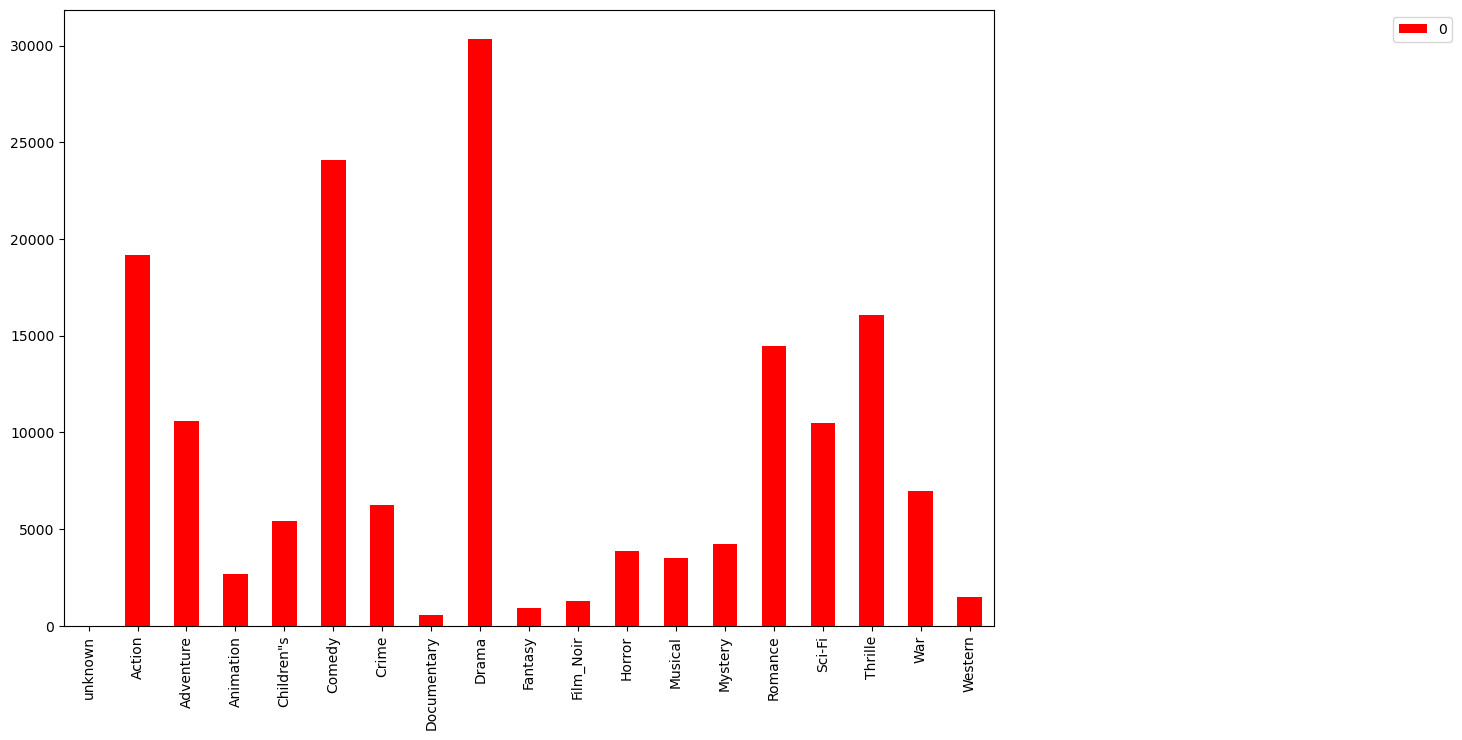

In [58]:
ax=k.iloc[1:,:].plot(kind="bar",cmap='magma',figsize=(12,8),color="red")
ax.legend(loc=1,bbox_to_anchor=(1.5,1.0))

           Predict the user's rating based on Genre for future movies

In [59]:
data.head()

,user_id,movie_id,rating,timestamp
0,0,50,5,1997-12-04 15:55:49
1,0,172,5,1997-12-04 15:55:49
2,0,133,1,1997-12-04 15:55:49
3,196,242,3,1997-12-04 15:55:49
4,186,302,3,1998-04-04 19:22:22


In [60]:
data.shape

(100003, 4)

In [61]:
data.isna().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [62]:
expanded.head()

,movie_id,movie_title,release_date,video_release_date,unknown,Action,Adventure,Animation,"Children""s",Comedy,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thrille,War,Western
0,1,Toy Story,1995-01-01,1995-01-01,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995-01-01,1995-01-01,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995-01-01,1995-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995-01-01,1995-01-01,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995-01-01,1995-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
expanded.shape

(1682, 23)

In [64]:
merged3=data.merge(expanded,how="left",on="movie_id")

In [65]:
merged3.head(1)

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,unknown,Action,Adventure,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thrille,War,Western
0,0,50,5,1997-12-04 15:55:49,Star Wars,1977-01-01,1977-01-01,0,1,1,...,0,0,0,0,0,1,1,0,1,0


In [66]:
merged3.drop(columns=["user_id","movie_id","movie_title","unknown","release_date","video_release_date","timestamp"],inplace=True)

In [67]:
merged3.head()

,rating,Action,Adventure,Animation,"Children""s",Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thrille,War,Western
0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [68]:
merged3.columns

Index(['rating', 'Action', 'Adventure', 'Animation', 'Children"s', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thrille', 'War', 'Western'],
      dtype='object')

In [69]:
s=merged3.groupby(["rating"])['Action', 'Adventure', 'Animation', 'Children"s', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thrille', 'War', 'Western'].sum()

C:\Users\Marzi\AppData\Local\Temp\ipykernel_9840\3737497796.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  s=merged3.groupby(["rating"])['Action', 'Adventure', 'Animation', 'Children"s', 'Comedy',


In [70]:
s

,Action,Adventure,Animation,"Children""s",Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thrille,War,Western
rating,,,,,,,,,,,,,,,,,,
1,1246.0,689.0,153.0,464.0,1877.0,374.0,45.0,1354.0,67.0,38.0,405.0,245.0,221.0,678.0,571.0,936.0,281.0,61.0
2,2593.0,1409.0,283.0,720.0,3181.0,713.0,44.0,2818.0,140.0,82.0,592.0,445.0,441.0,1559.0,1252.0,1979.0,577.0,147.0
3,5632.0,3102.0,760.0,1604.0,7072.0,1676.0,115.0,7565.0,286.0,281.0,1072.0,1021.0,1068.0,3779.0,2710.0,4541.0,1483.0,430.0
4,6204.0,3362.0,949.0,1697.0,7885.0,2181.0,209.0,11147.0,256.0,484.0,1141.0,1142.0,1522.0,5141.0,3546.0,5567.0,2459.0,532.0
5,3512.0,2044.0,527.0,907.0,4077.0,1323.0,161.0,7448.0,150.0,408.0,661.0,658.0,986.0,3309.0,2402.0,3054.0,2194.0,297.0


In [71]:
s["total"]=s.sum(axis=1)

In [72]:
s

,Action,Adventure,Animation,"Children""s",Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thrille,War,Western,total
rating,,,,,,,,,,,,,,,,,,,
1,1246.0,689.0,153.0,464.0,1877.0,374.0,45.0,1354.0,67.0,38.0,405.0,245.0,221.0,678.0,571.0,936.0,281.0,61.0,9705.0
2,2593.0,1409.0,283.0,720.0,3181.0,713.0,44.0,2818.0,140.0,82.0,592.0,445.0,441.0,1559.0,1252.0,1979.0,577.0,147.0,18975.0
3,5632.0,3102.0,760.0,1604.0,7072.0,1676.0,115.0,7565.0,286.0,281.0,1072.0,1021.0,1068.0,3779.0,2710.0,4541.0,1483.0,430.0,44197.0
4,6204.0,3362.0,949.0,1697.0,7885.0,2181.0,209.0,11147.0,256.0,484.0,1141.0,1142.0,1522.0,5141.0,3546.0,5567.0,2459.0,532.0,55424.0
5,3512.0,2044.0,527.0,907.0,4077.0,1323.0,161.0,7448.0,150.0,408.0,661.0,658.0,986.0,3309.0,2402.0,3054.0,2194.0,297.0,34118.0


In [73]:
import  matplotlib.pyplot as plt

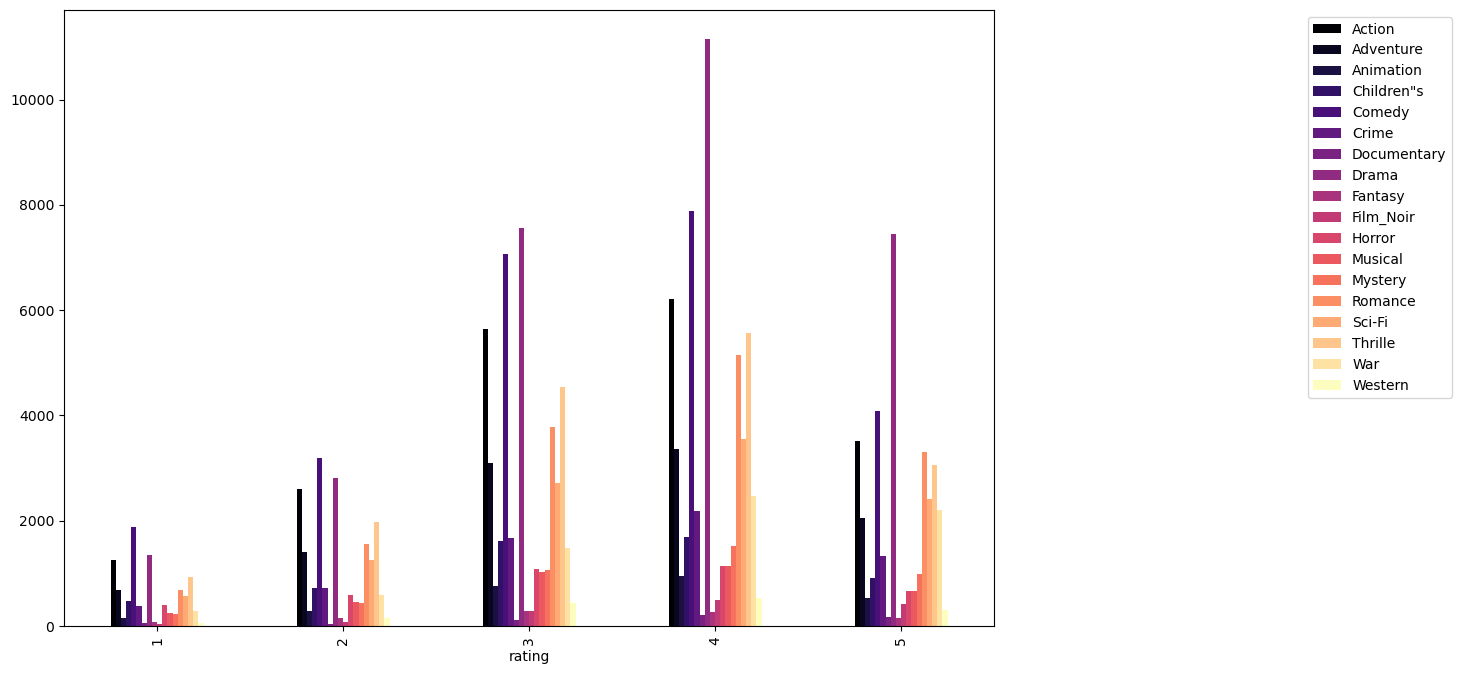

In [74]:
ax=s.iloc[:,:-1].plot(kind="bar",cmap='magma',figsize=(12,8))
ax.legend(loc=1,bbox_to_anchor=(1.5,1.0))



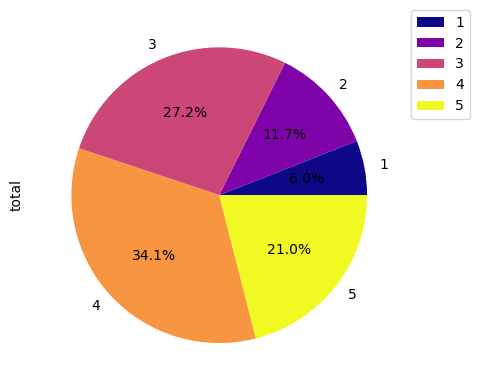

In [75]:
ax=s["total"].plot(kind="pie",autopct='%1.1f%%',cmap='plasma')
ax=ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [76]:
merged3.head()

,rating,Action,Adventure,Animation,"Children""s",Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thrille,War,Western
0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [77]:
merged3["rating"]=merged3["rating"].astype("category")

In [78]:
merged3_with_dummies=pd.get_dummies(merged3)

In [79]:
merged3_with_dummies.head(2)

,Action,Adventure,Animation,"Children""s",Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,...,Romance,Sci-Fi,Thrille,War,Western,rating_1,rating_2,rating_3,rating_4,rating_5
0,1,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
x=merged3.iloc[:,-5:]
y=merged3["Action"]
from sklearn.linear_model import LogisticRegression
 
logi=LogisticRegression()

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
def check_genre_with_rating(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
  
    logi.fit(x_train,y_train)
    return logi.predict(x_test),accuracy_score(y_test,logi.predict(x_test))

In [83]:
check_rating_with_genre(x,y)

NameError: name 'check_rating_with_genre' is not defined

In [84]:
merged3_with_dummies.columns

Index(['Action', 'Adventure', 'Animation', 'Children"s', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thrille', 'War', 'Western', 'rating_1',
       'rating_2', 'rating_3', 'rating_4', 'rating_5'],
      dtype='object')

In [85]:
genres= ['Action', 'Adventure', 'Animation', 'Children"s', 'Comedy', 
                 'Crime','Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thrille', 'War', 'Western']

In [86]:
for column in  genres:
    print(check_genre_with_rating(merged3.iloc[:,-5:],merged3[column]))

(array([0, 1, 0, ..., 0, 0, 0], dtype=uint8), 0.8305084745762712)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.8943552822358882)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.9738013099345033)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.9456027198640068)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.7564621768911555)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.9373531323433828)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.9933503324833758)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.7169141542922853)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.9916504174791261)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.9863506824658768)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.9613519324033798)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.9653017349132543)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.9586020698965052)
(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 1.0)
(array([1, 0, 0, ..., 1, 0, 0], dtype=uint8), 1.0)
(array([0, 0, 0, ..., 0, 1, 0], dtype=ui

In [87]:
logi.predict([[1,0,0,0,0]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

                      Predict what genre a user will watch based on their ZipCode

In [88]:
user.sort_values(by="user_id",inplace=True)

In [89]:
user.tail()

,user_id,age,gender,occupation,zip_code
938,939,26,1,student,33319
939,940,32,0,administrator,02215
940,941,20,0,student,97229
941,942,48,1,librarian,78209
942,943,22,0,student,77841


In [90]:
user.shape

(943, 5)

In [91]:
my_list=[]

for a in user["zip_code"]:
    
    for  char in str(a):
        if char not in "0123456789":
            
            my_list.append(a)
print(my_list,len(my_list))

['T8H1N', 'T8H1N', 'T8H1N', 'V3N4P', 'V3N4P', 'V3N4P', 'L9G2B', 'L9G2B', 'L9G2B', 'E2A4H', 'E2A4H', 'E2A4H', 'V0R2M', 'V0R2M', 'V0R2M', 'Y1A6B', 'Y1A6B', 'Y1A6B', 'V5A2B', 'V5A2B', 'V5A2B', 'M7A1A', 'M7A1A', 'M7A1A', 'M4J2K', 'M4J2K', 'M4J2K', 'R3T5K', 'R3T5K', 'R3T5K', 'T8H1N', 'T8H1N', 'T8H1N', 'N4T1A', 'N4T1A', 'N4T1A', 'V0R2H', 'V0R2H', 'V0R2H', 'K7L5J', 'K7L5J', 'K7L5J', 'V1G4L', 'V1G4L', 'V1G4L', 'L1V3W', 'L1V3W', 'L1V3W', 'N2L5N', 'N2L5N', 'N2L5N', 'E2E3R', 'E2E3R', 'E2E3R'] 54


In [92]:
indexes=[]
for a in user["zip_code"]:
    if a in my_list:
        indexes.append(list(user[user["zip_code"]==a].index))
print(indexes)
        

[[73, 633], [144], [166], [200], [332], [457], [489], [577], [593], [598], [73, 633], [708], [718], [778], [856], [900], [915], [922]]


In [93]:
drop_indexes=[73, 633, 144, 166, 200, 332,457, 489, 577, 593, 598, 73, 633, 708, 718, 778, 856, 900, 915, 922]

In [94]:
user.drop(index=drop_indexes,inplace=True)

In [95]:
user.shape

(925, 5)

In [96]:
user.reset_index(inplace=True,drop=True)

In [97]:
user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,0,technician,85711
1,2,53,1,other,94043
2,3,23,0,writer,32067
3,4,24,0,technician,43537
4,5,33,1,other,15213


In [98]:
import geopy

In [99]:
from geopy.geocoders import Nominatim

In [100]:
# plz donr run  thhe two cells below cause its gonna take ages ....i did and saved the result into a excel file!

In [101]:
#geolocator = Nominatim(user_agent="my_app")
#for i in range(925):
  #  print(geolocator.geocode(user["zip_code"].iloc[i]).longitude,geolocator.geocode(user["zip_code"].iloc[i]).latitude)
    

In [102]:
#geolocator = Nominatim(user_agent="my_app")
#for i in range(843,925):
 #   print(geolocator.geocode(user["zip_code"].iloc[i]).longitude,geolocator.geocode(user["zip_code"].iloc[i]).latitude)

In [103]:
lonlat=pd.read_excel("lonlat.xlsx",header=None)

In [104]:
lonlat.head()

,0,1
0,-110.878200,32.220887
1,-122.088807,37.407000
2,121.259507,24.974408
3,-83.682782,41.577662
4,126.813669,37.346706


In [105]:
lonlat.columns=["longitude","latitude"]

In [106]:
lonlat.head()

,longitude,latitude
0,-110.878200,32.220887
1,-122.088807,37.407000
2,121.259507,24.974408
3,-83.682782,41.577662
4,126.813669,37.346706


In [107]:
zip_lonlat=lonlat.merge(user,left_index=True,right_index=True,how='left')

In [108]:
zip_lonlat.drop(columns=["age","gender","occupation"],inplace=True)

In [109]:
new=data.merge(expanded,how="left",on="movie_id").drop(columns=["movie_id","rating","timestamp","release_date","video_release_date","unknown","movie_title"])

In [110]:
final=zip_lonlat.merge(new,how="left",on="user_id")

In [111]:
final.head()

,longitude,latitude,user_id,zip_code,Action,Adventure,Animation,"Children""s",Comedy,Crime,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thrille,War,Western
0,-110.8782,32.220887,1,85711,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-110.8782,32.220887,1,85711,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-110.8782,32.220887,1,85711,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,-110.8782,32.220887,1,85711,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-110.8782,32.220887,1,85711,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
x=final.iloc[:,0:2]
y=final["Comedy"] # each time i choose  one column and implement it in the function

In [115]:
def check_genre_with_zipcode(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    REG=LogisticRegression()
    REG.fit(x_train,y_train)
    return REG.predict(x),accuracy_score(y_test,REG.predict(x_test))

In [116]:
check_genre_with_zipcode(x,y)

(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.7595363325333198)

                Predict what genre a user will watch based on their occupation

In [117]:
df_occupation=user.merge(new,how="left",on="user_id").drop(columns=["user_id","age","gender","zip_code"])

In [118]:
df_occupation.head()

,occupation,Action,Adventure,Animation,"Children""s",Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thrille,War,Western
0,technician,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,technician,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,technician,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,technician,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,technician,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [119]:
df_occupation_dummy=pd.get_dummies(df_occupation)

In [120]:
df_occupation_dummy.head()

,Action,Adventure,Animation,"Children""s",Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [121]:
df_occupation_dummy.columns

Index(['Action', 'Adventure', 'Animation', 'Children"s', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thrille', 'War', 'Western',
       'occupation_administrator', 'occupation_artist', 'occupation_doctor',
       'occupation_educator', 'occupation_engineer',
       'occupation_entertainment', 'occupation_executive',
       'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer',
       'occupation_librarian', 'occupation_marketing', 'occupation_none',
       'occupation_other', 'occupation_programmer', 'occupation_retired',
       'occupation_salesman', 'occupation_scientist', 'occupation_student',
       'occupation_technician', 'occupation_writer'],
      dtype='object')

In [122]:
x=df_occupation_dummy[['occupation_administrator', 'occupation_artist', 'occupation_doctor',
       'occupation_educator', 'occupation_engineer',
       'occupation_entertainment', 'occupation_executive',
       'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer',
       'occupation_librarian', 'occupation_marketing', 'occupation_none',
       'occupation_other', 'occupation_programmer', 'occupation_retired',
       'occupation_salesman', 'occupation_scientist', 'occupation_student',
       'occupation_technician', 'occupation_writer']]

In [123]:
y=df_occupation_dummy["Drama"]

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
def check_genre_with_occupation(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    forest=RandomForestClassifier()
    forest.fit(x_train,y_train)
    return forest.predict(x_test),accuracy_score(y_test,forest.predict(x_test))
    

In [126]:
check_genre_with_occupation(x,y)

(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 0.6985650819588418)

                           Predict what genre a user will watch based on their age

In [127]:
df_age=user.merge(new,how="left",on="user_id")

In [128]:
df_age_clean=df_age.drop(columns=["user_id","gender","occupation","zip_code"])

In [129]:
df_age_clean.head()

,age,Action,Adventure,Animation,"Children""s",Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thrille,War,Western
0,24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [130]:
x=df_age_clean["age"].values.reshape(-1,1)

In [131]:
y=df_age_clean["Action"]

In [132]:
def check_genre_with_age(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    from sklearn.linear_model import LogisticRegression
    logi_age=LogisticRegression()
    logi_age.fit(x_train,y_train)
    return accuracy_score(y_test,logi_age.predict(x_test)),logi_age.predict(x_test)
    

In [133]:
check_genre_with_age(x,y)

(0.8114180666904969, array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

In [134]:
import seaborn as sns

In [135]:
age_mean=[]
for column in genres:
       age_mean.append(list(df_age_clean.groupby([column])["age"].mean())[1])

In [141]:
age_mean_data=pd.DataFrame({"genre":genres,"age_mean":age_mean})

In [143]:
age_mean_data.set_index("genre",inplace=True)

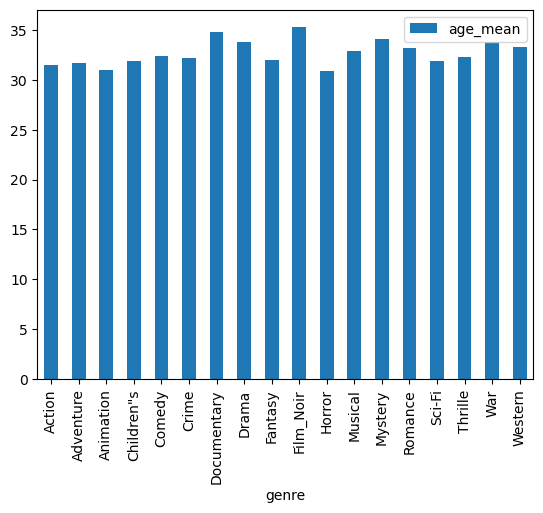

In [145]:
age_mean_data.plot(kind="bar")
plt.show()

First thing first, extracting useful information out of messy columns, here we have multiple datasets which are somehow related to each other, the most important part of data wrangling is dropping “unknow” column because its goanna make multicollinearity,because it is  extremely related to rest of genres!
In first question, I have been asked to guess the rating base on the genre and popularity:
I made a dataset and called it “rating popularity”, using ‘groupby‘ method and getting mean rating and count of view per movie(popularity).
I went a little bit further and wanted to show popularity and rating visually, what I see here; people tend to watch drama movies and the second popularity goes to comedy genre and the third to action genre! (It can be considered by production companies, the more view, the more revenue).
The thing is with considering the efficiency of my model, I guess genre of movies and popularity are not the only factor to decide and guess the rating, as it is apparent each genre has its mediocre, disaster and awesome movies.
Second question, predicting users rating based on genre:
I started it with making the best and proper data frame out of all the given datasets.
Before choosing and implementing the machine learning model I would prefer to show diagrams to see vividly what’s going on here! The biggest chunk of movies with genre of drama got rating 4, and people don’t have tendency to watch western movies (important to be considered). here random forest comes to play!
Predict what genre a user will watch based on their Zip Code:
The most interesting part of the whole assessment.
After preparing proper and suitable data frame out of what we have in hands, now how can I deal with the zip codes?
After dropping nonsense zip codes (zip codes contains alphabets) with the aid of “geopy” I converted them into longitude and latitude. I continued the journey with logistic regression and machine worked with accuracy of %70-ish!
for last two questions again making proper dataset is our priority!

In [147]:
pd.read_csv("u.item.csv")

,1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2|GoldenEye (1995)|01-Jan-1995||http://us.imdb...,NaN,NaN,NaN,NaN,NaN
1,3|Four Rooms (1995)|01-Jan-1995||http://us.imd...,NaN,NaN,NaN,NaN,NaN
2,4|Get Shorty (1995)|01-Jan-1995||http://us.imd...,NaN,NaN,NaN,NaN,NaN
3,5|Copycat (1995)|01-Jan-1995||http://us.imdb.c...,NaN,NaN,NaN,NaN,NaN
4,6|Shanghai Triad (Yao a yao yao dao waipo qiao...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1676,1678|Mat' i syn (1997)|06-Feb-1998||http://us....,NaN,NaN,NaN,NaN,NaN
1677,1679|B. Monkey (1998)|06-Feb-1998||http://us.i...,NaN,NaN,NaN,NaN,NaN
1678,1680|Sliding Doors (1998)|01-Jan-1998||http://...,NaN,NaN,NaN,NaN,NaN
1679,1681|You So Crazy (1994)|01-Jan-1994||http://u...,NaN,NaN,NaN,NaN,NaN
